In [1]:
using HDF5
using ImageView
#using Images
#include("C:/Users/Rutian Zhou/PIV/multi_quickPIV/src/multi_quickPIV.jl")
#using Plots

In [4]:
using PyCall
using PyPlot

In [5]:
using multi_quickPIV

In [6]:
using ImageAnalysis

In [7]:
include("multiscale_multistep_filter.jl")

multiscale_multigrid_gradient_segment (generic function with 1 method)

In [8]:
file_path = "F:/PhD_Franziska/Headon/RedBeads/subregion_cut1(2).h5"
function read_h5(folder_path::String, data_name::String)
    h5open(folder_path, "r") do file
        read(file, data_name)
    end
end
red_beads = read_h5(file_path, "red")
green_aggret = read_h5(file_path, "green")

800×900×375 Array{UInt16, 3}:
[:, :, 1] =
 0x00d4  0x00c6  0x00ca  0x00d1  0x00bc  …  0x007a  0x0081  0x0084  0x0089
 0x00c6  0x00d5  0x00d0  0x00c4  0x00bd     0x0077  0x0082  0x0079  0x0078
 0x00c1  0x00c8  0x00ca  0x00cb  0x00bc     0x007c  0x007e  0x007d  0x0072
 0x00c7  0x00c3  0x00be  0x00be  0x00ab     0x0084  0x0087  0x0083  0x0080
 0x00c8  0x00d0  0x00d3  0x00bd  0x00b0     0x007f  0x007a  0x0078  0x007e
 0x00cf  0x00ce  0x00bf  0x00c4  0x00ca  …  0x0076  0x0075  0x0080  0x0085
 0x00df  0x00d8  0x00d0  0x00c8  0x00cb     0x007a  0x0083  0x008d  0x007d
 0x00e2  0x00ce  0x00c6  0x00c8  0x00c5     0x0082  0x007d  0x007f  0x0086
 0x00d3  0x00b2  0x00c2  0x00cf  0x00b2     0x0082  0x0075  0x007c  0x0080
 0x00d0  0x00b2  0x00af  0x00d1  0x00ba     0x0074  0x006f  0x0089  0x0078
 0x00bf  0x00c6  0x00d1  0x00d0  0x00c7  …  0x007a  0x007f  0x008f  0x0075
 0x00c2  0x00c4  0x00c8  0x00c4  0x00c2     0x007f  0x0078  0x006f  0x0071
 0x00bd  0x00d7  0x00a9  0x00c5  0x00bc     0x007a  0x007b

In [7]:
ImageView.imshow(Float16.(red_beads[:, :, 1]))

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(accessible-role=GT…
  "roi"         => Dict{String, Any}("redraw"=>ObserverFunction[ObserverFunctio…
  "annotations" => Observable(Dict{UInt64, Any}())
  "clim"        => Observable(CLim{Float16}(38.0, 392.0))

In [25]:
# multi_quickPIV.similarityAveraging() # Postprocessing method filter out the vectors that differ too much from 
                                        # surrounding vectors. 

## Do PIV only on two images

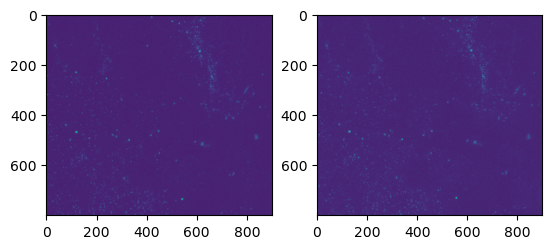

PyObject <matplotlib.image.AxesImage object at 0x000001633A6B0A70>

In [9]:
# Multiscale_multistep_filter
img1 = Float16.(red_beads[ :, :, 170])
img2 = Float16.(red_beads[ :, :, 180])

subplot( 1, 2, 1 ); PyPlot.imshow(img1)
subplot(1, 2, 2); PyPlot.imshow(img2)

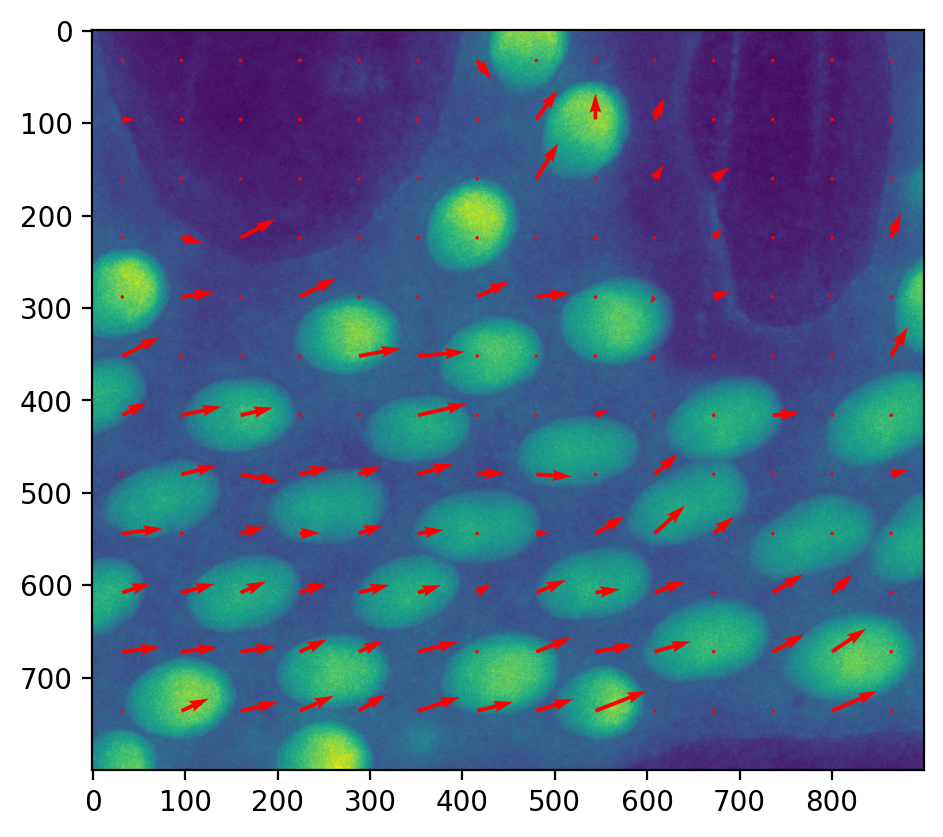

PyObject <matplotlib.quiver.Quiver object at 0x0000016317DF6B40>

In [10]:
pivparams = multi_quickPIV.setPIVParameters(interSize=(64, 64), searchMargin=(128, 128), step=(64, 64), computeSN=true)
VF, SN = multi_quickPIV.PIV( img1, img2, pivparams, precision=16)

IA = multi_quickPIV._isize(pivparams)
ST = multi_quickPIV._step(pivparams)

U = VF[ 1, :, : ]
#U.*= ( SN .> 1.015 )
V = VF[ 2, :, : ]
#V.*= ( SN .> 1.015 )

M = sqrt.( U .^ 2 .+ V .^ 2 ) # Magnitude of the vectors.
U.*= ( M .< 20 )
V.*= ( M .< 20 )
ygrid = [ ( y - 1 )*ST[1] + div( IA[1], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]
xgrid = [ ( x - 1 )*ST[2] + div( IA[2], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]

PyPlot.figure( dpi=200 ); 

PyPlot.imshow( green_aggret[:, :, 300] )
PyPlot.quiver( xgrid, ygrid, V, -U, color="red", scale=200)

In [14]:
U

12×14 Matrix{Float64}:
  0.0        0.0         0.0        0.0       …   0.0          0.0
  0.210194  -0.0789776  -0.360141   0.042332     -0.0         -0.00150187
 -0.0        0.0         0.0       -0.621622      0.18984     -0.0
 -0.0        1.42356    -4.42187   -0.0          -0.011462    -5.87252
 -0.0       -1.14557    -0.0       -4.53165      -0.00655272   0.0
 -4.56747    0.0         0.0       -0.0       …   0.0         -7.0
 -3.12177   -2.08235    -1.81463    0.0           0.0          0.0
  0.0       -2.08727     1.83729   -1.76719       0.0597308   -1.0
 -1.17994    0.0        -1.63965   -0.136135      0.0         -0.149035
 -2.33327   -2.10801    -2.66118   -2.26943      -4.2835       0.0
 -1.13683   -1.04779    -1.28128   -2.93308   …  -5.51786     -0.0
 -0.0       -2.98751    -2.03534   -3.615        -4.78842     -0.0

In [20]:
using Statistics
SN # Define a function for threshold. U .*= ( SN .> 1.4 )
mean(SN)

1.0246471226444145

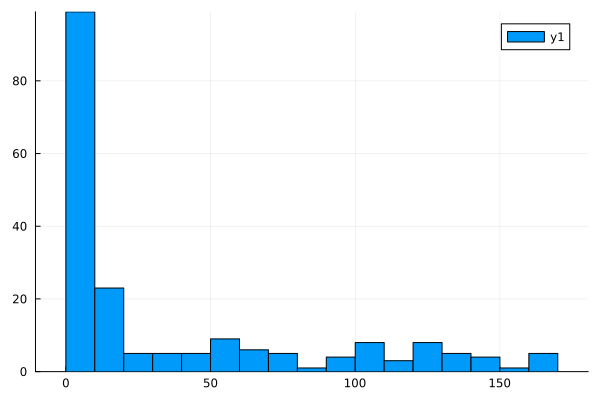

In [72]:
using Plots
histogram(vec(M), bins=20)

## Generating PIV with sliding window between frame t0 to frame t1.
Chosen 10 frames as distance for PIV analysation. 

In [49]:
function sliding_window_PIV(img_series, t0, t1, frame_dist)
    
    pivparams = multi_quickPIV.setPIVParameters(interSize=(64, 64), searchMargin=(128, 128), step=(64, 64), computeSN=true)
    
    m_U = Matrix{Float32}[]
    m_V = Matrix{Float32}[]
    m_xgrid = Matrix{Float32}[]
    m_ygrid = Matrix{Float32}[]
    m_M = Matrix{Float32}[]
    
    for i in t0:t1 
        
        img1 = Float16.(img_series[:, :, i])
        img2 = Float16.(img_series[:, :, i+frame_dist])

        VF, SN = multi_quickPIV.PIV( img1, img2, pivparams, precision=16)

        IA = multi_quickPIV._isize(pivparams)
        ST = multi_quickPIV._step(pivparams)
        
        U = VF[ 1, :, : ]
        #U.*= ( SN .> 1.015 )
        V = VF[ 2, :, : ]
        #V.*= ( SN .> 1.015 )
        
        M = sqrt.( U .^ 2 .+ V .^ 2 ) # Magnitude of the vectors.
        U.*= ( M .< 20 )
        V.*= ( M .< 20 )
        ygrid = [ ( y - 1 )*ST[1] + div( IA[1], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]
        xgrid = [ ( x - 1 )*ST[2] + div( IA[2], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]

        push!(m_U, U)
        push!(m_V, V)
        push!(m_xgrid, xgrid)
        push!(m_ygrid, ygrid)
        push!(m_M, M)
        print("tu")
    end

    # Converting dimensions with time.
    U_data = reduce((x,y) -> cat(x,y,dims=3), m_U)
    V_data = reduce((x,y) -> cat(x,y,dims=3), m_V)
    xgrid_data = reduce((x,y) -> cat(x,y,dims=3), m_xgrid)
    ygrid_data = reduce((x,y) -> cat(x,y,dims=3), m_ygrid)
    M_data = reduce((x,y) -> cat(x,y,dims=3), m_M)
    
    return U_data, V_data, xgrid_data, ygrid_data, M_data
end

sliding_window_PIV (generic function with 1 method)

In [50]:
m_U, m_V, m_xgrid, m_ygrid, m_M = sliding_window_PIV(red_beads, 150, 200, 10)
m_U

tututututututututututututututututututututututututututututututututututututututututututututututututututu

12×14×51 Array{Float32, 3}:
[:, :, 1] =
  0.0       0.0         0.0        1.41565  …   0.898426     0.0
  3.60207   0.0103625   5.15817    3.355       -0.0         -0.115935
 -0.0      -0.0        -0.0       -0.0          0.0235898   -0.0
 -0.0      -3.9218     -7.53486   -0.0         -0.262278   -10.6427
 -0.0      -2.19498     0.0       -6.74567      1.10279     -9.0
 -0.0      -4.68145     0.0       -3.12672  …   0.159992     0.0
 -3.14372  -0.0         0.0        0.0          0.0         -7.0
 -3.19718  -5.2099     -3.57901   -2.47077     -5.68817      0.0
 -1.36117   0.0432369  -0.0       -2.60286     -0.0         -0.0908208
 -2.96897  -1.75727    -3.05777   -2.89346      0.0          0.0
 -2.30198  -6.15031    -0.871414  -4.00147  …   0.0          0.0
 -0.0      -4.38898    -0.0       -3.06566     -5.03201     -6.27672

[:, :, 2] =
  0.0       0.0        0.0      …   0.0         0.0         0.0
  3.59521   0.122376  -0.0         -0.0145188   3.48426     0.0
 -0.0      -0.0      

In [53]:
# Store the data into .h5 file. 
h5open("U_matrix", "w") do file
    write(file, "matrix", m_U)
end

h5open("V_matrix", "w") do file
    write(file, "matrix", m_V)
end

h5open("M_matrix", "w") do file
    write(file, "matrix", m_M)
end

h5open("xgrid_matrix", "w") do file
    write(file, "matrix", m_xgrid)
end

h5open("ygrid_matrix", "w") do file
    write(file, "matrix", m_ygrid)
end

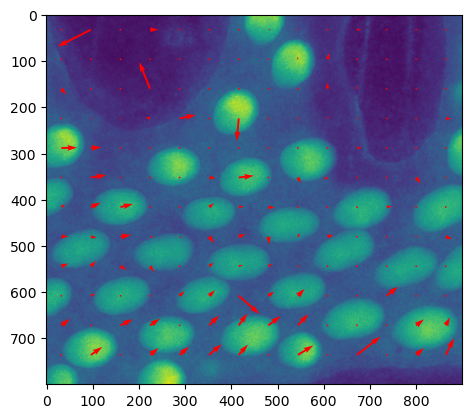

PyObject <matplotlib.quiver.Quiver object at 0x00000163E5373260>

In [44]:
t=50
PyPlot.imshow( green_aggret[:, :, 300] )
PyPlot.quiver( m_xgrid[:, :, t], m_ygrid[:, :, t], m_V[:, :, t], -m_U[:, :, t], 
    color="red", scale=200)

## Store the vector field +data into .h5 file. 

In [4]:
params = multi_quickPIV.setPIVParameters(interSize=(16, 16), searchMargin=(32, 32), step=(8, 8))
IA = multi_quickPIV._isize(params)
ST = multi_quickPIV._step(params)

m_U = Matrix{Float32}[]
m_V = Matrix{Float32}[]
m_xgrid = Matrix{Float32}[]
m_ygrid = Matrix{Float32}[]
m_M = Matrix{Float32}[]

for i in 1:150 #1:size(red_beads, 3)-1
    
    img1 = Float16.(red_beads[:, :, i])
    img2 = Float16.(red_beads[:, :, i+1])

    VF, _ = multi_quickPIV.PIV( img1, img2, params)

    U = VF[ 1, :, : ]
    V = VF[ 2, :, : ]
    M = sqrt.( U .^ 2 .+ V .^ 2 )

    ygrid = [ ( y - 1 )*ST[1] + div( IA[1], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]
    xgrid = [ ( x - 1 )*ST[2] + div( IA[2], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]
    
    push!(m_U, U)
    push!(m_V, V)
    push!(m_xgrid, xgrid)
    push!(m_ygrid, ygrid)
    push!(m_M, M)

    print("tu")
    
end

# Converting dimensions with time.
U_data = reduce((x,y) -> cat(x,y,dims=3), m_U)
V_data = reduce((x,y) -> cat(x,y,dims=3), m_V)
xgrid_data = reduce((x,y) -> cat(x,y,dims=3), m_xgrid)
ygrid_data = reduce((x,y) -> cat(x,y,dims=3), m_ygrid)
M_data = reduce((x,y) -> cat(x,y,dims=3), m_M)

tutututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututututu

17×16×150 Array{Float32, 3}:
[:, :, 1] =
 28.4473     8.94427  32.2182     1.0       …  32.7567   31.3008   34.176
 28.0487    22.9766    7.67901    1.52831      14.1229   30.3036   31.0483
  2.07231    8.94427   1.72837    1.77406      22.0193   20.1786   14.8638
  2.16576    8.94427  31.8929    28.3632        9.82089  10.349    37.1831
  4.0        8.24621   1.58133    1.76387      26.8363   28.7891   41.0334
  1.93847    9.75591  32.6358     1.81706   …  20.7557   23.0263   25.4677
  1.95905    1.95937  33.5261    40.6079       23.9541   15.07     24.4657
  2.01174   29.6513   18.3208    40.6079       27.2715    2.67419  19.6399
 20.5278     6.60143  15.3497    11.2427       33.672     2.48005  11.4654
  1.39116    7.19902   5.62003    4.13686      17.4833    6.36339   3.76079
  1.10678   15.5512    1.2843     0.916071  …  17.4923   15.9676   27.3628
  0.935869   1.05701   1.03947    0.987385     33.2415   17.4573   19.0857
  1.15141   30.3718    0.796503   0.290339     30.5307   17

In [1]:
m_U[1]

LoadError: UndefVarError: `m_U` not defined

In [5]:
h5open("piv_single_aggregate1_downwards_cut1", "w") do file
    write(file, "U", U_data)
    write(file, "V", V_data)
    write(file, "xgrid", xgrid_data)
    write(file, "ygrid", ygrid_data)
    write(file, "M", M_data)
end

BoundsError: BoundsError: attempt to access empty String at index [1:44]